<a href="https://colab.research.google.com/github/aryanwalia2003/car_price_prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

In [ ]:
df=pd.read_csv("car_price.csv")

In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.shape

(6019, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [ ]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df.Mileage.fillna(df.Mileage.mean,inplace=True)
df.Engine.fillna(df.Engine.mean,inplace=True)
df.Power.fillna(df.Power.mean,inplace=True)
df.Seats.fillna(df.Seats.mean,inplace=True)
df.New_Price.fillna(df.New_Price.mean,inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#  for column in df:
#   if df[column].dtypes=='object':
#     print(f'{column}:{df[column].unique()}')

In [ ]:
mileage_train = df["Mileage"].str.split(" ", expand = True)
mileage_test = df["Mileage"].str.split(" ", expand = True)

df["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')

In [ ]:
df.Mileage.dtype

dtype('float64')

In [ ]:
mileage_train = df["Power"].str.split(" ", expand = True)
mileage_test = df["Power"].str.split(" ", expand = True)

df["Power"] = pd.to_numeric(mileage_train[0], errors = 'coerce')

In [ ]:
df.Power.dtype

dtype('float64')

In [ ]:
mileage_train = df["Engine"].str.split(" ", expand = True)
mileage_test = df["Engine"].str.split(" ", expand = True)

df["Engine"] = pd.to_numeric(mileage_train[0], errors = 'coerce')

In [ ]:
df.Engine.dtype

dtype('float64')

In [ ]:
df.drop(columns={"Seats"},inplace=True)

In [ ]:
df.drop(columns={"New_Price"},inplace=True)

In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.Transmission=le.fit_transform(df.Transmission)

In [ ]:
df.Fuel_Type=le.fit_transform(df.Fuel_Type)
df.Owner_Type=le.fit_transform(df.Owner_Type)

In [ ]:
df.drop(columns={"Name"},inplace=True)

In [ ]:
df.drop(columns={"Unnamed: 0"},inplace=True)

In [ ]:
df.drop(columns={"Location"},inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
# df.drop(columns="Year",inplace=True)

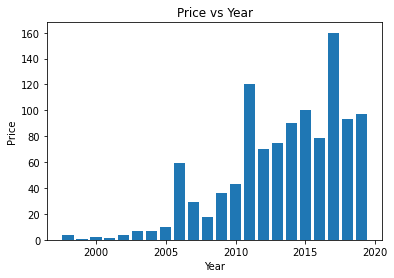

In [ ]:
plt.bar(df.Year,df.Price)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
corr_df=df.drop(columns={"Fuel_Type","Transmission"})

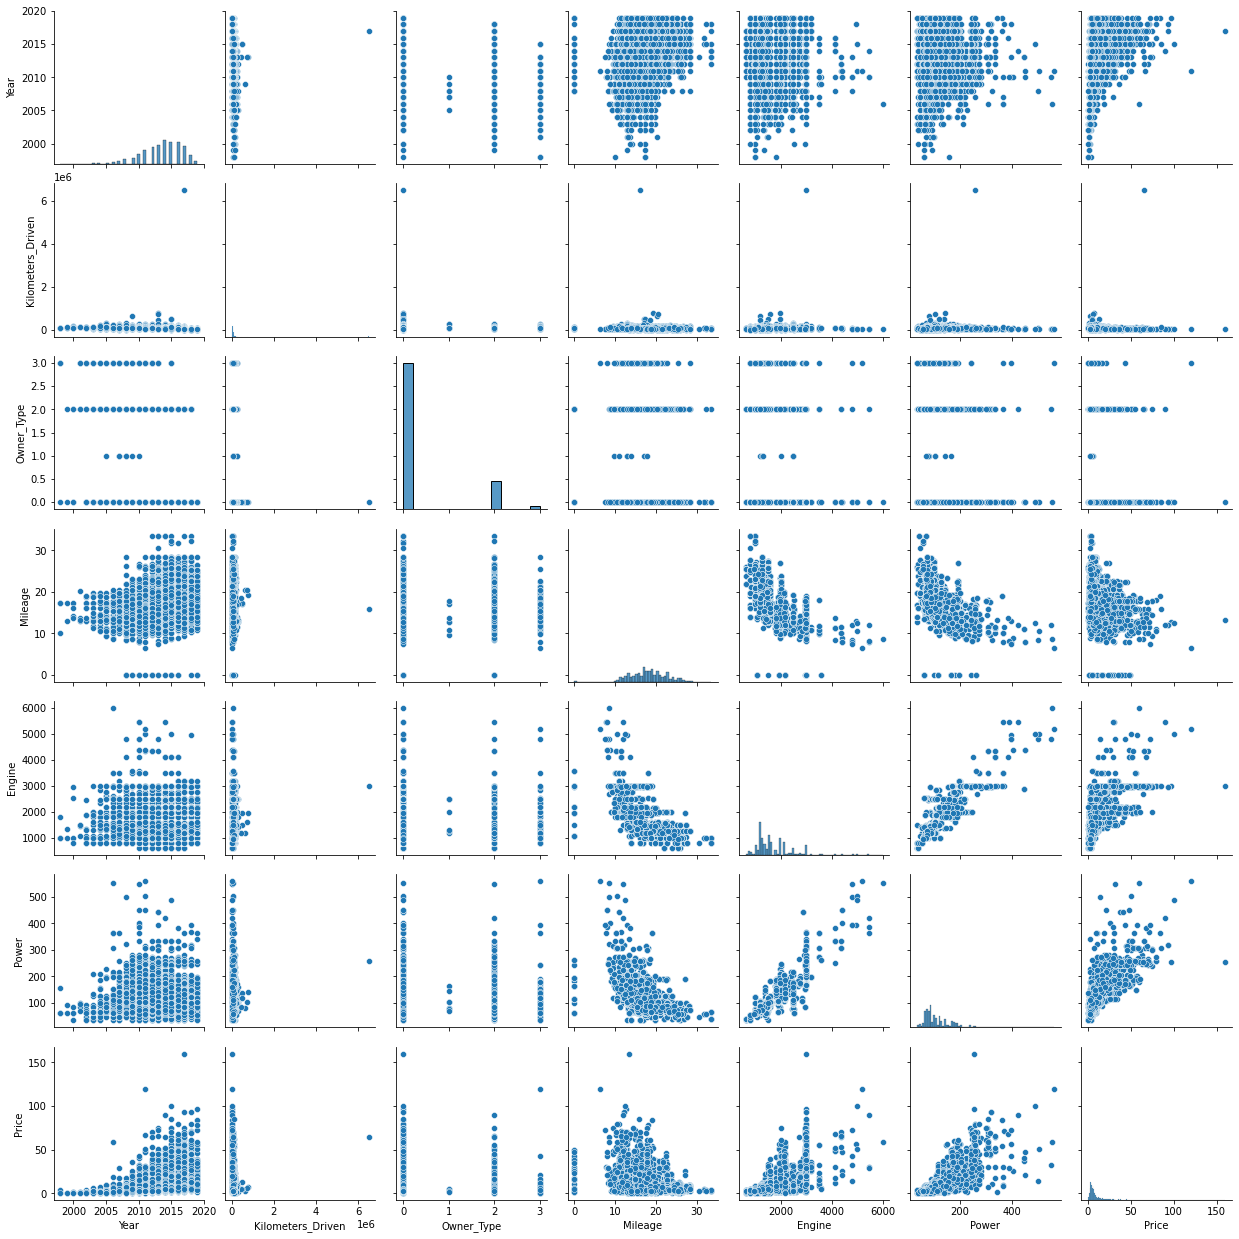

In [ ]:
sns.pairplot(corr_df)

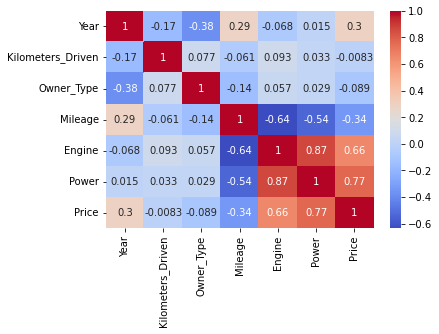

In [ ]:
sns.heatmap(corr_df.corr(),annot=True,cmap="coolwarm")

In [ ]:
X=df.drop(columns={"Price"})

In [ ]:
y=df.Price

In [ ]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5874, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

((4699, 8), (1175, 8))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.723623739354398

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 60,random_state=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8942700864345393

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gdb=GradientBoostingRegressor(learning_rate=0.3, n_estimators=100)
gdb.fit(X_train,y_train)
y_pred=gdb.predict(X_test)
r2_score(y_test,y_pred)

0.9143361176998202

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=5, min_samples_split=10,random_state=2)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
r2_score(y_test,y_pred)

0.8250796342203037

In [ ]:
clfs = {
    'Gradient Boosting': gdb,
    'Decision Tree': dt,
    'Linear Regression': lr,
    'Random Forest': rf,
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = r2_score(y_test,y_pred)

    return accuracy

In [ ]:
r2_scores = []

for name,clf in clfs.items():

    current_r2 = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("R2 Score - ",current_r2)

    r2_scores.append(current_r2)


For  Gradient Boosting
R2 Score -  0.915633830442099
For  Decision Tree
R2 Score -  0.8250796342203037
For  Linear Regression
R2 Score -  0.723623739354398
For  Random Forest
R2 Score -  0.8942700864345393
